# Problem 4.2: Shuffled Cards - data reader

The following is a small program to read the data file "data_ShuffledCards.txt", which contains four columns: Number in deck, Card name, Value, and Suit.

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [2]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import random

In [3]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [4]:
# Read the data and print it to check it:
import numpy as np

data = np.genfromtxt("./data_ShuffledCards.txt", skip_header=2)
number = data[:,0]
value = data[:,4]
suit = data[:,5]

print("Number of entries: ", len(number))
for i in range(len(number)) : 
    print(f"  {int(number[i]):2.0f}:  {value[i]:4.0f}   {suit[i]:3.0f}")

Number of entries:  52
   1:    13     4
   2:     9     1
   3:    14     2
   4:    12     4
   5:    11     4
   6:     8     1
   7:    13     2
   8:     8     4
   9:    10     4
  10:     7     1
  11:    11     2
  12:     7     4
  13:     9     4
  14:     5     1
  15:    10     2
  16:     3     4
  17:     6     4
  18:     4     1
  19:     7     2
  20:     2     2
  21:     5     4
  22:     3     1
  23:     6     2
  24:    13     1
  25:     4     4
  26:     2     1
  27:     5     2
  28:    11     3
  29:    14     3
  30:     9     2
  31:     2     4
  32:    10     3
  33:    14     1
  34:     8     2
  35:    13     3
  36:     9     3
  37:    12     1
  38:     4     2
  39:    12     3
  40:     8     3
  41:    10     1
  42:     3     2
  43:     4     3
  44:     7     3
  45:     6     1
  46:    14     4
  47:     3     3
  48:     5     3
  49:    12     2
  50:     6     3
  51:    11     1
  52:     2     3


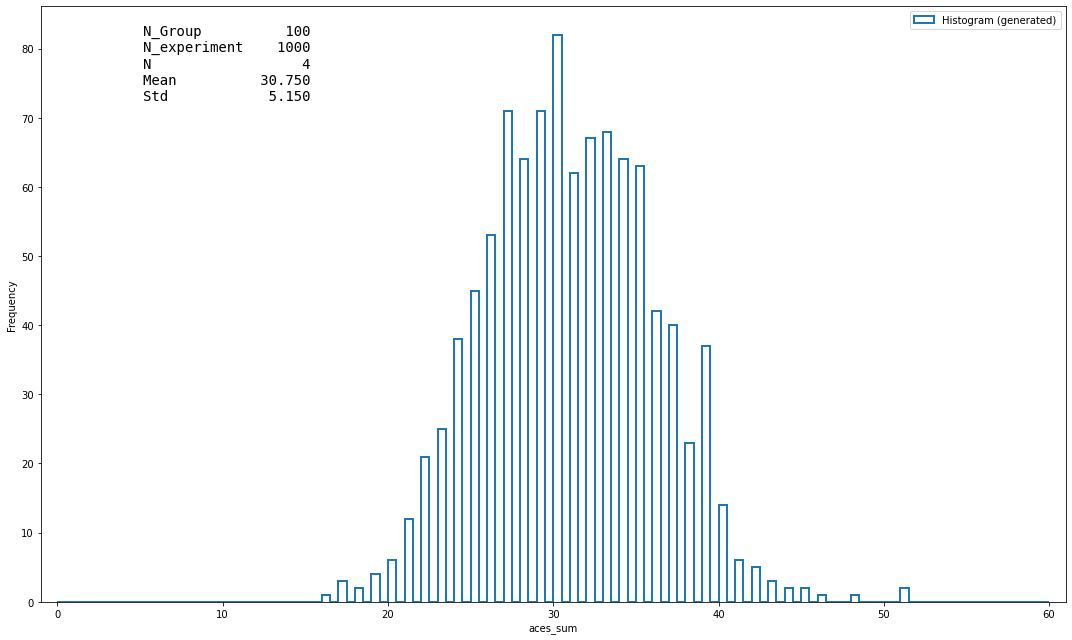

In [5]:
N_Group = 100  # 100组
N_experiment = 1000  # 1000次试验
N = 4

d_value = np.zeros(N)
d_Group = []
sum_1 = []

for i_2 in range(0,N_experiment):

    for j in range(0,N_Group):  # 1000组
        draw_out = random.choices(data, k=4)  # 随机抽4张牌

        for k in range (0,4):
            d_value[k] = draw_out[k][4]
        d_Group = np.append(d_Group,d_value)
    # print(d_Group)

    a = d_Group == 14  # 实际是进行bool判断
    # print(sum(a))
    sum_1 = np.append(sum_1,sum(a))
    # print(sum_1)
    d_Group = []

'''
N_bins = 120
xmin, xmax = 0,60

fig1, ax1 = plt.subplots(figsize=(16, 7)) 
hist1 = ax1.hist(sum_1, bins=N_bins, range=(xmin, xmax), histtype='step', linewidth=2)
ax1.set(xlabel='aces_sum', ylabel='Frequency', title='Histogram of aces_sum');
'''

N_bins = 120
xmin, xmax = 0,60
binwidth = (xmax - xmin) / N_bins

# plot sum
fig, ax = plt.subplots(figsize=(15, 9))
ax.hist(sum_1, bins=N_bins, range=(xmin, xmax), histtype='step', linewidth=2,label='Histogram (generated)' )
ax.set(xlabel="aces_sum", ylabel="Frequency", xlim=(xmin-1.0, xmax+1.0)) # 不知道为什么原来是"Frequency / 0.2"

# Plot f(x)
x_axis1 = np.linspace(xmin, xmax, 1000)

# Define figure text
d = {'N_Group' : N_Group,
     'N_experiment' : N_experiment,
     'N' : N,
     'Mean': sum_1.mean(),
     'Std': sum_1.std(ddof=1),
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.1, 0.97, text, ax, fontsize=14)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

# Save figure
fig.savefig("Histogram of aces_sum.png", dpi=600)